## דוגמאות בסיסיות של Pandas

מחברת זו תדריך אותך דרך כמה מושגים בסיסיים מאוד של Pandas. נתחיל בייבוא ספריות מדע נתונים טיפוסיות:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### סדרות

סדרה היא כמו רשימה או מערך חד-ממדי, אבל עם אינדקס. כל הפעולות מיושרות לפי האינדקס.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


אחת השימושים הנפוצים בסדרות היא **סדרות זמן**. בסדרות זמן, לאינדקס יש מבנה מיוחד - בדרך כלל טווח של תאריכים או זמנים. ניתן ליצור אינדקס כזה באמצעות `pd.date_range`.

נניח שיש לנו סדרה שמציגה את כמות המוצרים שנרכשה בכל יום, ואנחנו יודעים שבכל יום ראשון אנחנו גם צריכים לקחת פריט אחד לעצמנו. כך ניתן לדמות זאת באמצעות סדרות:


Length of index is 366


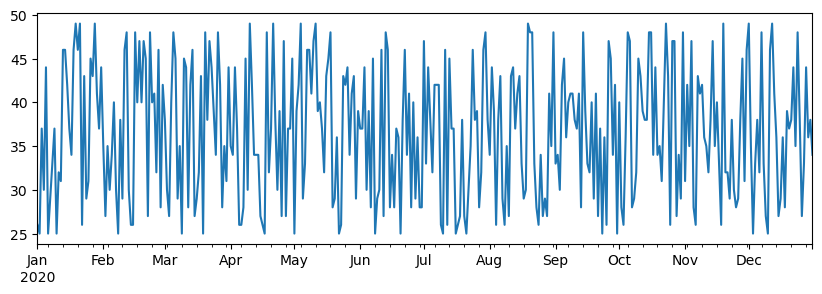

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


כפי שאתה יכול לראות, יש לנו בעיות כאן, כי בסדרה השבועית ימים שלא הוזכרו נחשבים כחסרים (`NaN`), והוספת `NaN` למספר נותנת לנו `NaN`. כדי לקבל תוצאה נכונה, אנחנו צריכים לציין `fill_value` כאשר מוסיפים סדרות:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


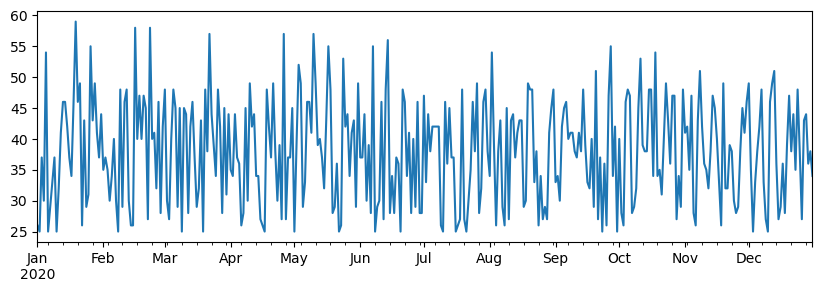

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

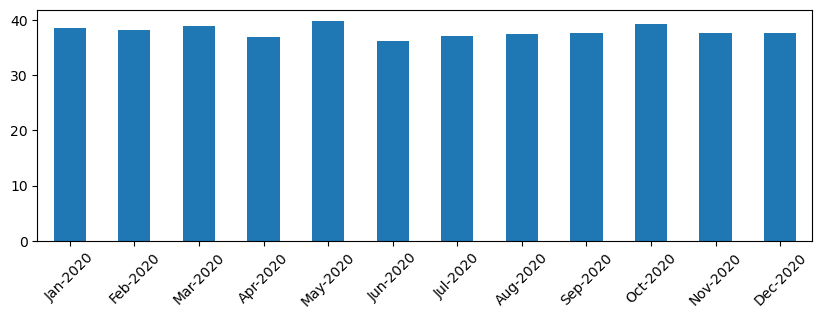

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame הוא למעשה אוסף של סדרות עם אותו אינדקס. ניתן לשלב כמה סדרות יחד לתוך DataFrame. בהתחשב בסדרות `a` ו-`b` שהוגדרו למעלה:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

אנחנו יכולים גם להשתמש בסדרות כעמודות, ולציין שמות עמודות באמצעות מילון:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

ניתן להשיג את אותה תוצאה על ידי טרנספוזיציה (ולאחר מכן שינוי שמות העמודות, כדי להתאים לדוגמה הקודמת):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

בחירת עמודות מתוך DataFrame יכולה להתבצע כך:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


בחירת שורות בהתבסס על ביטוי סינון:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

הדרך שבה זה עובד היא שהביטוי `df['A']<5` מחזיר סדרת בוליאנית, שמציינת האם הביטוי הוא `True` או `False` עבור כל אחד מהאלמנטים בסדרה. כאשר הסדרה משמשת כאינדקס, היא מחזירה תת-קבוצה של שורות ב-DataFrame. לכן, לא ניתן להשתמש בביטוי בוליאני שרירותי של פייתון, לדוגמה, כתיבה של `df[df['A']>5 and df['A']<7]` תהיה שגויה. במקום זאת, יש להשתמש בפעולה מיוחדת `&` על סדרות בוליאניות:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

יצירת עמודות ניתנות לחישוב. אנו יכולים ליצור בקלות עמודות ניתנות לחישוב חדשות עבור DataFrame שלנו באמצעות ביטויים אינטואיטיביים. הקוד למטה מחשב את הסטייה של A מערך הממוצע שלו.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

מה שקורה בפועל הוא שאנחנו מחשבים סדרה, ואז משייכים את הסדרה הזו לצד השמאלי, ויוצרים עמודה נוספת.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**בחירת שורות על סמך מספרים** ניתן לבצע באמצעות מבנה `iloc`. לדוגמה, כדי לבחור את 5 השורות הראשונות מתוך ה-DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**קיבוץ** משמש לעיתים קרובות כדי לקבל תוצאה דומה ל*טבלאות ציר* באקסל. נניח שאנחנו רוצים לחשב את הערך הממוצע של עמודה `A` עבור כל מספר נתון של `LenB`. אז נוכל לקבץ את DataFrame שלנו לפי `LenB`, ולקרוא ל-`mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

אם אנחנו צריכים לחשב ממוצע ומספר האלמנטים בקבוצה, אז אנחנו יכולים להשתמש בפונקציית `aggregate` מורכבת יותר:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## הדפסה ויצירת גרפים

מדעני נתונים צריכים לעיתים קרובות לחקור את הנתונים, ולכן חשוב להיות מסוגלים להציג אותם בצורה חזותית. כאשר DataFrame גדול, פעמים רבות נרצה רק לוודא שאנחנו עושים הכל נכון על ידי הדפסת השורות הראשונות. ניתן לעשות זאת על ידי קריאה ל-`df.head()`. אם אתם מריצים את זה מתוך Jupyter Notebook, זה ידפיס את ה-DataFrame בצורה טבלאית ונוחה.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

כבר ראינו את השימוש בפונקציה `plot` כדי להמחיש כמה עמודות. בעוד ש-`plot` מאוד שימושית עבור משימות רבות ותומכת בסוגי גרפים שונים באמצעות הפרמטר `kind=`, תמיד ניתן להשתמש בספריית `matplotlib` הגולמית כדי ליצור גרפים מורכבים יותר. נעסוק בהמחשת נתונים בפירוט בשיעורים נפרדים של הקורס.


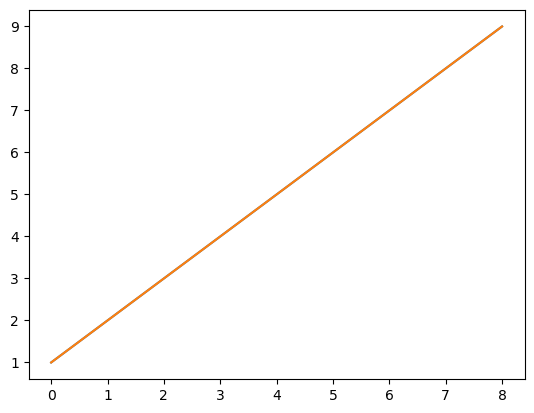

In [61]:
df['A'].plot()
plt.show()

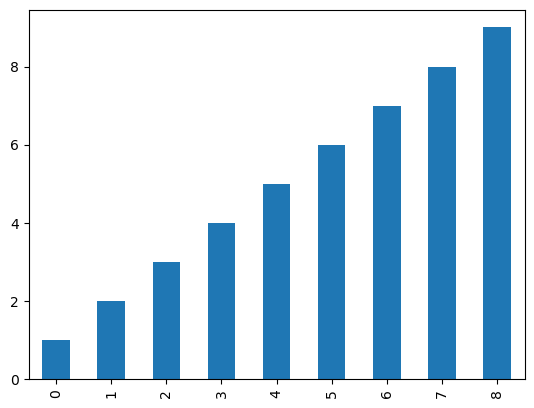

In [63]:
df['A'].plot(kind='bar')
plt.show()

סקירה זו מכסה את המושגים החשובים ביותר של Pandas, אך הספרייה עשירה מאוד, ואין גבול למה שאפשר לעשות איתה! עכשיו ניישם את הידע הזה כדי לפתור בעיה ספציפית.



---

**כתב ויתור**:  
מסמך זה תורגם באמצעות שירות תרגום מבוסס בינה מלאכותית [Co-op Translator](https://github.com/Azure/co-op-translator). למרות שאנו שואפים לדיוק, יש להיות מודעים לכך שתרגומים אוטומטיים עשויים להכיל שגיאות או אי דיוקים. המסמך המקורי בשפתו המקורית צריך להיחשב כמקור סמכותי. עבור מידע קריטי, מומלץ להשתמש בתרגום מקצועי על ידי אדם. איננו נושאים באחריות לאי הבנות או לפרשנויות שגויות הנובעות משימוש בתרגום זה.
